In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset
data = pd.read_csv(r"C:\Users\sarab\OneDrive\Desktop\UM\Supply chain\supply_chain_data.csv")
print("Initial Sample:")
display(data.head())

Initial Sample:


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [3]:
# Drop rows with missing values
data = data.dropna()

# Set target and drop irrelevant or identifier columns
target = 'Number of products sold'
X = data.drop(columns=[target])
y = data[target]

In [4]:
# Handle categorical variables using one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [5]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Build the neural network model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

C:\Users\sarab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - loss: 311436.9688 - val_loss: 288625.1875
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 310827.4062 - val_loss: 288320.0000
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 292296.0625 - val_loss: 288005.7812
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 313523.9688 - val_loss: 287676.3125
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 282909.3750 - val_loss: 287311.1250
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 291567.1562 - val_loss: 286906.7500
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 302118.3750 - val_loss: 286459.8750
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 297471.7812 - val_loss: 285971.9062
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 304736.9375 - val_loss: 285441.3125
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 282916.5625 - val_loss: 284858.2500
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 287618.1

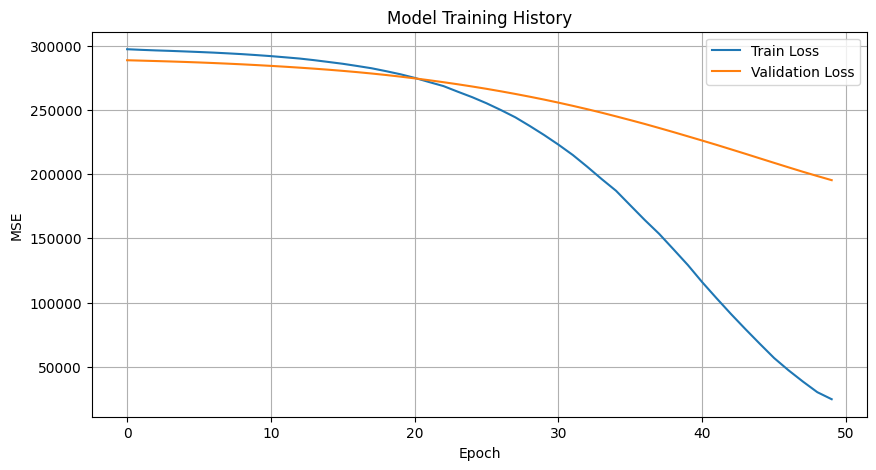

In [7]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Model Training History')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Test MSE: 130215.64


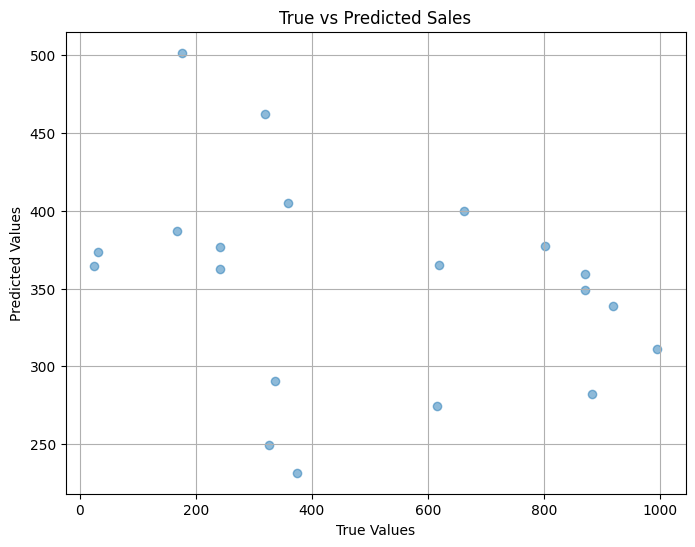

In [8]:
# Evaluate on test data
predictions = model.predict(X_test_scaled).flatten()
mse = mean_squared_error(y_test, predictions)
print(f"Test MSE: {mse:.2f}")

# Scatter plot of true vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Sales')
plt.grid(True)
plt.show()

In [9]:
# Save model and example prediction
model.save('demand_forecasting_model.h5')
print("Model saved as 'demand_forecasting_model.h5'")

# Example future prediction
example = X_test.iloc[:1]
example_scaled = scaler.transform(example)
prediction = model.predict(example_scaled)
print(f"Example prediction: {prediction[0][0]:.2f}")

Model saved as 'demand_forecasting_model.h5'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Example prediction: 399.66
